# AutoPandas

<img src="logo_autodata.png" alt="drawing" width="200"/>

<center><h2> Process, visualize and use data easily.</h2></center>

In [7]:
import autopandas as ad
%reload_ext autoreload
%autoreload 2

# 1. Read data

Easily load CSV, AutoML or pd.DataFrame

AutoData is a subclass of pd.DataFrame

In [27]:
input_file = 'autopandas/data/wine.csv'
data = ad.read_csv(input_file, sep=None, engine='python')

**Keys:**
* **Row**: train, valid, test, header
* **Column**: X, y, categorical, numerical

In [3]:
data.get_data('header')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Set the target variable if needed

In [30]:
data.set_class('quality') #['age', 'fnlwgt']) #['income', 'gender']
#data.train_test_split(test_size=0.3)

Get a subset of data

In [5]:
#data.get_data('X_header')
data.get_data('categorical_header')
#data.get_data('y_test')
#data.get_data('numerical_header')

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Descriptiors

In [38]:
print(data.ratio()) # ratio dimension / number of examples
print(data.symbolic_ratio())  # ratio of symbolic attributes
print(data.missing_ratio())   # ratio of missing values
print(data.class_deviation()) # 
print(data.skew().max())  # max skewness
print(data.skew().mean()) # mean skewness
print(data.get_task())
data.describe()

0.002449979583503471
0.25
0.0
0.8856385749678312
5.023330682759703
1.2050348501831898
classification


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# 2. Processings


Parameters: **method** and **targeted** set (key).

**Missing values imputation**

In [13]:
data = data.imputation()

**Encoding**

In [5]:
data = data.encoding('label', 'categorical')

**Normalization**

In [15]:
data = data.normalization('min-max', 'numerical')
#data2 = data.normalization('min-max', 'numerical')

In [18]:
data.min(axis=0)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

# 3. Visualization

y set plot
TODO: class coloration


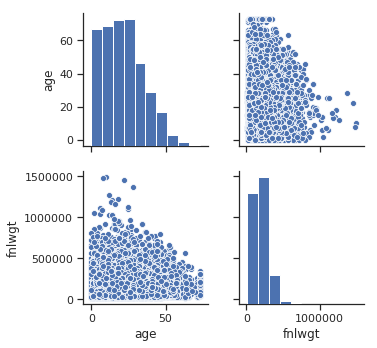

In [8]:
data.plot('y')

TODO: class coloration


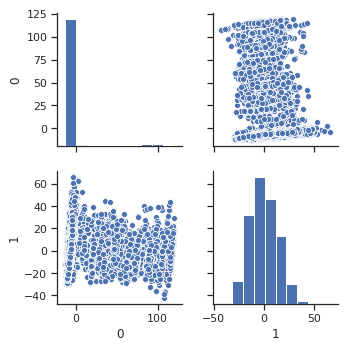

In [12]:
data.pca(n_components=2).plot()

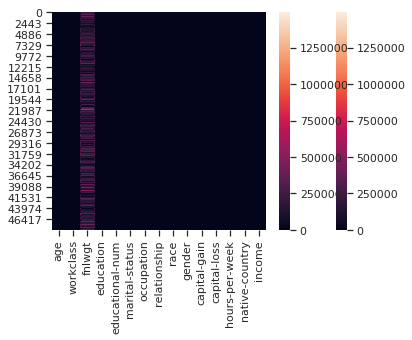

In [24]:
data.plot()
#data.heatmap()

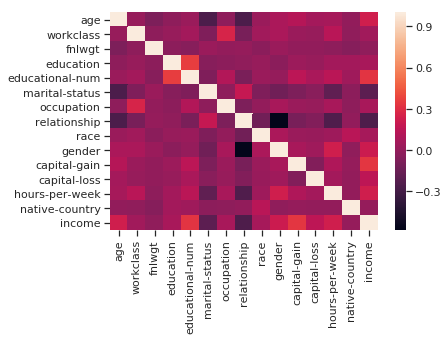

In [25]:
data.corr().plot()
#data.correlation()

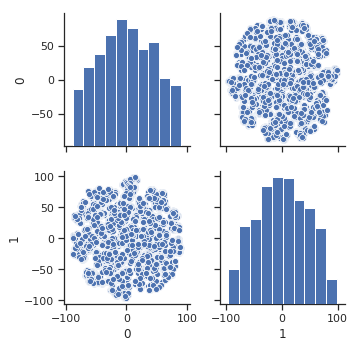

In [13]:
data.get_data('X_test').tsne().plot()

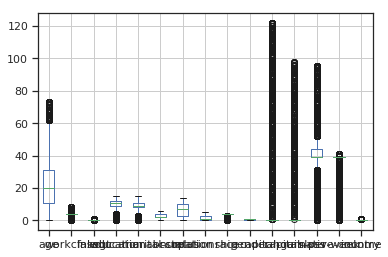

In [14]:
data.boxplot()

In [20]:
# debug coloration
#import seaborn as sns
#sns.pairplot(data, hue='income')
#data.plot(data, hue='income')

# 4. Benchmark

In [13]:
data.score()

0.37422880181349505

In [14]:
data.set_class('income')
data.score()

0.8502593502593503

Call auto-sklearn

In [ ]:
#data.score(method='automatic')

Compute score with different metrics

In [ ]:
# TODO

# 5. Comparison

#### Two similar datasets (subsets of the same distribution)

In [40]:
ad1 = ad.read_csv('autopandas/data/squares1.csv', sep=None, engine='python')
ad2 = ad.read_csv('autopandas/data/squares2.csv', sep=None, engine='python')

### 3 types of distances:

#### 1) Between points

...

#### 2) Between columns
* Kolmogorov-Smirnof
* Mutual information
* Jensen-Shannon

#### 3) Between distributions (datasets)

* Eucliden

In [41]:
ad1.distance(ad2)

0.0212277604680553

* Nearest Neihbors Adversarial Accuracy?
* MMD?
* etc.

* Binary classification / Discriminant / Classifier score

In [52]:
print(ad1.distance(ad2, method='discriminant'))

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(20, 20))
print(ad1.distance(ad2, method='discriminant', model=model))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

   Dataset 1       0.92      0.54      0.68      3554
   Dataset 2       0.09      0.49      0.16       344

   micro avg       0.54      0.54      0.54      3898
   macro avg       0.51      0.52      0.42      3898
weighted avg       0.84      0.54      0.63      3898


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validatio

### Overlay plot

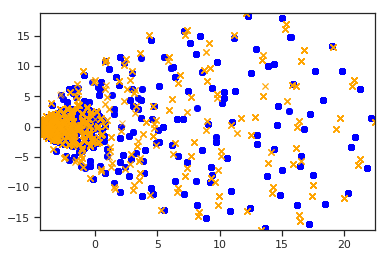

In [38]:
pca1 = ad1.pca(n_components=2)
pca2 = ad2.pca(n_components=2)
pca1.plot(ad=pca2)

TODO: class coloration


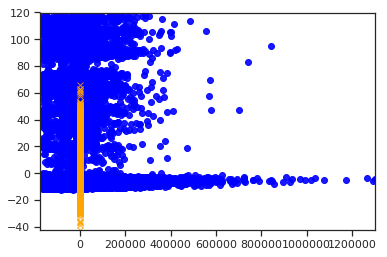

In [20]:
#pca1 = data.pca(n_components=2)
#pca2 = data2.pca(n_components=2)
#ad.plot(pca1, pca2)

### Marginal plots

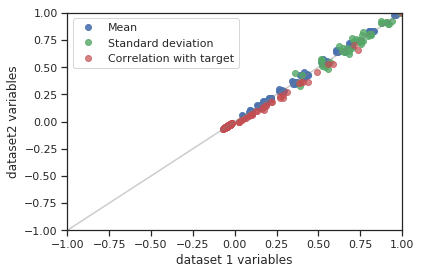

In [42]:
ad1.compare_marginals(ad2, method='all', target='0.0') # if no target, it uses the defined class

# 6. Generation

* Copy

In [6]:
#data.generate(model=model)
gen = ad.generators.Copycat()
gen.fit(data)
gen.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3943,24,22,15,6.6,35,28,113.0,0.994080,22,35,21,3
4579,19,22,26,14.7,34,69,125.0,0.998365,22,46,11,3
1947,16,72,42,1.1,40,79,197.0,0.993200,25,17,7,2
1654,27,74,49,7.4,41,19,184.0,0.995600,34,15,7,2
4674,17,52,29,3.2,23,49,151.0,0.991200,58,35,60,4


* ANM

In [16]:
gen = ad.generators.ANM()
gen.fit(data)
gen.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,26,46,34,4.330,33,29,102.7,0.991848,51,37,70,4
1,19,22,24,1.800,19,33,105.1,0.990989,54,24,57,3
2,13,57,40,3.305,43,32,152.8,0.994684,65,29,8,2
3,30,36,40,13.790,39,83,215.2,0.997995,41,35,15,3
4,37,42,71,1.430,126,55,144.2,0.994800,31,19,6,2
